<a href="https://colab.research.google.com/github/mastermindankur/stock-analysis/blob/main/Support_Resistance_SK_Anku_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bsedata
!pip install quandl

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import quandl
%matplotlib inline

In [ ]:
# to be ale to view numbers in human readable format 2.058691e+08
#izbxGLp_K_zzzUJdN9sp
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
quandl.ApiConfig.api_key = ''

In [ ]:
sbi =quandl.get('BSE/BOM500325', start_date='2020-12-01', end_date='2021-01-15')

**Pivot Point Calculation**

Pivot point (PP) = (High + Low + Close) / 3.

First resistance (R1) = (2 x PP) – Low.

First support (S1) = (2 x PP) – High.

Second resistance (R2) = PP + (High – Low)

Second support (S2) = PP – (High – Low)

Third resistance (R3) = High + 2(PP – Low)

Third support (S3) = Low – 2(High – PP)

In [ ]:
sbi['PP']= (sbi['High']+sbi['Low']+sbi['Close'])/3
sbi['R1']= 2*sbi['PP'] -sbi['Low']
sbi['S1']= 2*sbi['PP'] -sbi['High']
sbi['R2']= sbi['PP'] + (sbi['High'] - sbi['Low']) 
sbi['S2']= sbi['PP'] - (sbi['High'] - sbi['Low']) 
sbi['R3']= sbi['High'] + 2*(sbi['PP'] - sbi['Low'])
sbi['S3']= sbi['Low'] - 2*(sbi['High'] - sbi['PP'])

In [ ]:
#No of shares worth 50,000 Rupees
# Up and Down are the ticks above and below which we want to execute trade
no_of_shares=50000/sbi['Open'].median()
up= sbi['Spread H-L'].median()*.10
down= sbi['Spread H-L'].median() *.10
#up=1
#down=1

**I will set the Target price in such a way, that i am will buy above the Support and will want to sell it below the Resistance**

In [ ]:
sbi['Buy']= sbi['S1'].shift(1) + up
sbi['Sell']= sbi['R1'].shift(1) - down

In [ ]:
#sbi[['Open','High','Low','Close','PP','S1','R1','Buy','Sell']].head()

The following Flags are set for 'got_it':

**1** - If we are able to Buy at Support+delta and Sell at Resistance-delta the same day. Successful Trade.

**2** - If we are able to Buy at Support+delta but not able to sell it since the Resistance-delta price never came.

**0** - If we are not able to buy at all since Support+delta price was never reached that day

In [ ]:
#sbi['got_it']=(sbi['Buy']>sbi['Low']) & (sbi['Sell'] <sbi['High']) & (sbi['Sell']>sbi['Buy'])
# Set initial value set to 0 of all elements
sbi['got_it'] = 0

# if the trade happened between support and resistance levels, put 1 in got_it column
sbi.loc[(sbi['Buy']>sbi['Low']) & (sbi['Sell'] <sbi['High']) & (sbi['Sell']>sbi['Buy']),'got_it']=1

# If i was able to Buy but not able to sell it becuase price did not hit resistance level, put 2 in got_it column
sbi.loc[(sbi['Buy']>sbi['Low']) & (sbi['Sell'] >sbi['High']) ,'got_it']=2

When Resistance Level was hit the same day and trade happened successfully:

**Profit = Selling Price  - Buying Price**

However, when Resitance price did not hit, we are forcing to sell at Closing Price for that day. In that case:

**Profit = Closing Price - Buying Price**

In [ ]:
#df['color'] = np.where(df['Set']=='Z', 'green', 'red')
sbi['Profit']=0
profit= sbi['Sell']-sbi['Buy']
forced_profit_or_loss= sbi['Close']-sbi['Buy']

sbi.loc[(sbi['got_it']==1) ,'Profit']=profit
sbi.loc[(sbi['got_it']==2) ,'Profit']=forced_profit_or_loss
#sbi['Profit'] = np.where(sbi['got_it']==1, profit, 0)
#sbi['Profit'] = np.where(sbi['got_it']==2, forced_profit_or_loss, 0)

In [ ]:
sbi['got_it'].value_counts()

0    17
2     8
1     8
Name: got_it, dtype: int64

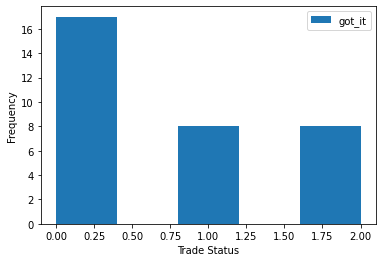

In [ ]:
sbi['got_it'].plot.hist(bins=5)
plt.ylabel('Frequency')
plt.xlabel('Trade Status')
plt.legend()

**Calculating the Profit for the following 3 scenarios:**

1 - If we are able to Buy at Support+delta and Sell at Resistance-delta the same day. Successful Trade.

2 - If we are able to Buy at Support+delta but not able to sell it since the Resistance-delta price never came.

TOTAL PROFIT

In [ ]:
sbi[sbi['got_it']==2]['Profit'].sum()

-83.95000000000005

In [ ]:
sbi[sbi['got_it']==1]['Profit'].sum()

212.3500000000015

In [ ]:
sbi['Profit'].sum()

128.40000000000146

If we had executed every trade worth 50,000 Rs, How much we would have made?

In [ ]:
sbi['Profit'].sum() * no_of_shares

3258.8832487310015

Calculating the **Percentage Return**

Return = Profit/ Average Price * 100

In [ ]:
sbi['Open'].mean()

1970.8181818181824

In [ ]:
x=sbi['Profit'].sum()/sbi['Open'].mean() *100
print("The profit percentage you can get is {rate}".format(rate=x))

The profit percentage you can get is 6.51506065777949


**Plotting Some Charts**

In [ ]:
sbi[['Open','High','Low','Close','PP','S1','R1','Buy','Sell','got_it','Profit']].tail(10)

,Open,High,Low,Close,PP,S1,R1,Buy,Sell,got_it,Profit
Date,,,,,,,,,,,
2021-01-04,1988.550,1997.900,1967.900,1990.650,1985.483,1973.067,2003.067,1983.633,1992.433,1,8.800
2021-01-05,1972.050,1984.000,1956.000,1966.000,1968.667,1953.333,1981.333,1976.167,1999.967,2,-10.167
2021-01-06,1968.000,1968.000,1905.000,1914.150,1929.050,1890.100,1953.100,1956.433,1978.233,2,-42.283
2021-01-07,1921.900,1945.200,1905.650,1911.000,1920.617,1896.033,1935.583,1893.200,1950.000,0,0.000
2021-01-08,1920.900,1938.200,1912.700,1933.050,1927.983,1917.767,1943.267,1899.133,1932.483,0,0.000
2021-01-11,1935.000,1938.900,1892.250,1897.000,1909.383,1879.867,1926.517,1920.867,1940.167,2,-23.867
2021-01-12,1910.000,1960.000,1900.000,1956.650,1938.883,1917.767,1977.767,1882.967,1923.417,0,0.000
2021-01-13,1964.800,1974.950,1918.650,1939.100,1944.233,1913.517,1969.817,1920.867,1974.667,1,53.800
2021-01-14,1939.100,1966.500,1936.050,1960.600,1954.383,1942.267,1972.717,1916.617,1966.717,0,0.000


In [ ]:
sbi[['Open','High','Low','Close','PP','S1','R1','Buy','Sell','got_it','Profit']].to_excel('Stock.xlsx',sheet_name='xx')

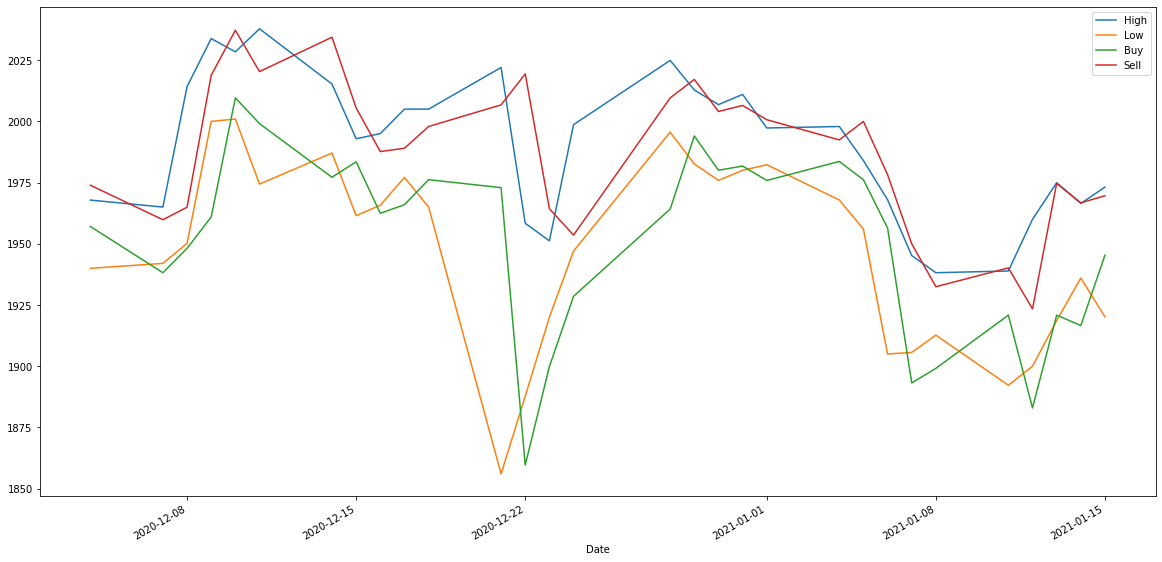

In [ ]:
sbi[['High','Low','Buy','Sell']].tail(30).plot(figsize=(20,10))

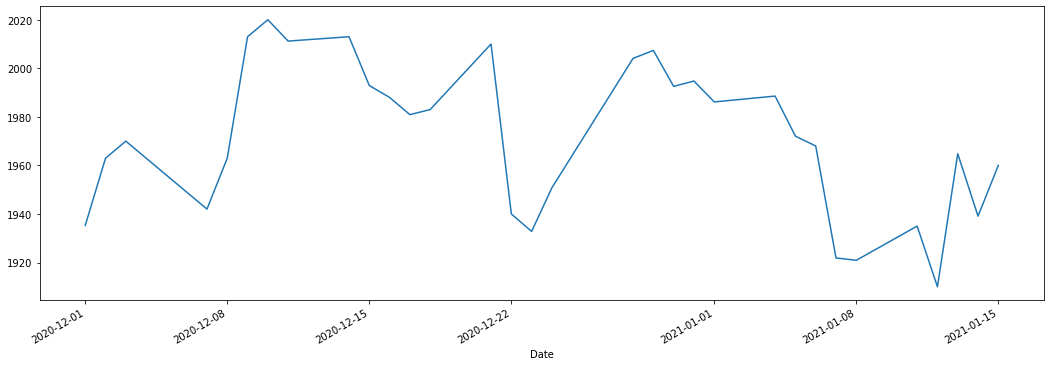

In [ ]:
sbi['Open'].plot(figsize=(18,6))